# **Indicador Distância para Média Móvel**

## 1.Bibliotecas necessárias

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import mplfinance as mpf

## 2. Importação dos dados

In [2]:
df = yf.download('^BVSP', interval='1d', start='2005-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,26193.0,26492.0,25671.0,25722.0,25722.0,0
2005-01-04,25722.0,25873.0,24791.0,24848.0,24848.0,0
2005-01-05,24859.0,25001.0,24523.0,24692.0,24692.0,0
2005-01-06,24695.0,24808.0,24250.0,24367.0,24367.0,0
2005-01-07,24376.0,24874.0,24376.0,24747.0,24747.0,0


## 3. Condições

In [4]:
df = df.drop(['Adj Close', 'Volume'], axis=1)

In [5]:
df['Valor_medio'] = (df['Open'] + df['High'] + df['Low'] + df['Close'])/4
df['Media_20'] = df['Valor_medio'].rolling(20).mean()
df['Dist_media'] = abs(df['Close'] - df['Media_20'])
df['Dist_media_mm'] = df['Dist_media'].expanding().mean()

In [6]:
df.head()

,Open,High,Low,Close,Valor_medio,Media_20,Dist_media,Dist_media_mm
Date,,,,,,,,
2005-01-03,26193.0,26492.0,25671.0,25722.0,26019.50,NaN,NaN,NaN
2005-01-04,25722.0,25873.0,24791.0,24848.0,25308.50,NaN,NaN,NaN
2005-01-05,24859.0,25001.0,24523.0,24692.0,24768.75,NaN,NaN,NaN
2005-01-06,24695.0,24808.0,24250.0,24367.0,24530.00,NaN,NaN,NaN
2005-01-07,24376.0,24874.0,24376.0,24747.0,24593.25,NaN,NaN,NaN


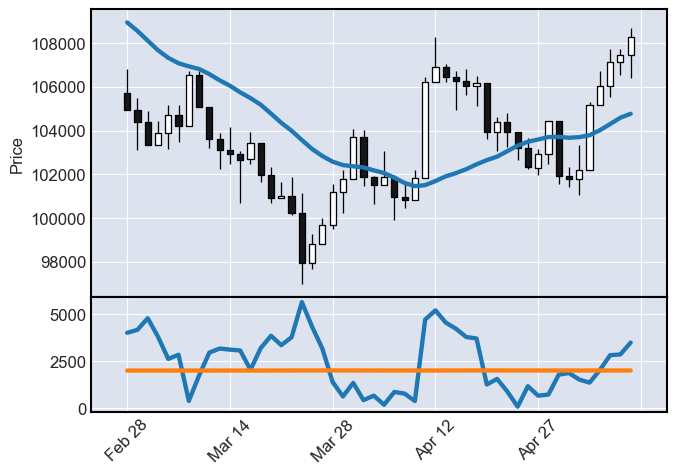

In [7]:
df_plot = df.iloc[-50:]
plot_ind = mpf.make_addplot(df_plot['Dist_media'], panel=1)
plot_ind_mm = mpf.make_addplot(df_plot['Dist_media_mm'], panel=1)
plot_mm = mpf.make_addplot(df_plot['Media_20'])
mpf.plot(df_plot, type='candle', addplot=[plot_ind, plot_mm, plot_ind_mm])

## 4.2. Tentativa de backtest 2

In [8]:
# Calcular as médias móveis de 20 e 50 períodos
df['MA20'] = df['Close'].rolling(20).mean()
df['MA50'] = df['Close'].rolling(50).mean()

In [9]:
# Criar coluna que indica sinais de compra e venda
df['signal'] = 0
df.loc[(df['MA20'] > df['MA50']) & (df['MA20'].shift(1) < df['MA50'].shift(1)), 'signal'] = 1
df.loc[(df['MA20'] < df['MA50']) & (df['MA20'].shift(1) > df['MA50'].shift(1)), 'signal'] = -1

In [10]:
# Aplicar filtro na coluna distance
df['filtered_signal'] = 0
df.loc[(df['signal'] == 1) & (df['Dist_media'] > df['Dist_media_mm']), 'filtered_signal'] = 1
df.loc[(df['signal'] == -1) & (df['Dist_media'] < df['Dist_media_mm']), 'filtered_signal'] = -1


In [11]:
# Calcular o retorno total
df['return'] = df['Close'].pct_change() * df['filtered_signal'].shift(1)
total_return = (df['return'] + 1).cumprod()[-1]

# Calcular a taxa de acerto
trades = df.loc[df['filtered_signal'] != 0]
win_trades = trades.loc[trades['return'] > 0]
hit_rate = len(win_trades) / len(trades)


In [12]:
trades

,Open,High,Low,Close,Valor_medio,Media_20,Dist_media,Dist_media_mm,MA20,MA50,signal,filtered_signal,return
Date,,,,,,,,,,,,,
2005-04-11,25884.0,25943.0,25695.0,25900.0,25855.50,26771.3500,871.3500,1273.198177,26717.95,26841.20,-1,-1,0.000000
2005-07-25,25388.0,25388.0,24410.0,24531.0,24929.25,25178.1625,647.1625,834.622314,25173.50,25193.70,-1,-1,-0.000000
2005-08-01,26042.0,26452.0,25911.0,26298.0,26175.75,25266.6000,1031.4000,827.154960,25314.50,25305.16,1,1,0.000000
2005-11-16,30219.0,30516.0,30157.0,30482.0,30343.50,30049.4500,432.5500,899.024749,30050.35,30067.74,-1,-1,0.000000
2005-11-17,30483.0,31248.0,30483.0,31087.0,30825.25,30105.3625,981.6375,899.437812,30151.30,30123.10,1,1,-0.019848
2006-03-31,37783.0,38016.0,37619.0,37952.0,37842.50,37578.4250,373.5750,929.287158,37555.05,37608.20,-1,-1,0.000000
2006-04-06,39053.0,39310.0,38700.0,39285.0,39087.00,37801.2250,1483.7750,934.318412,37879.00,37805.54,1,1,0.000000
2006-09-14,36548.0,36680.0,36087.0,36154.0,36367.25,36607.6375,453.6375,1012.366995,36586.10,36615.54,-1,-1,-0.000000
2006-10-16,38852.0,39261.0,38672.0,39229.0,39003.50,36786.2500,2442.7500,1019.940310,36882.60,36835.48,1,1,0.000000


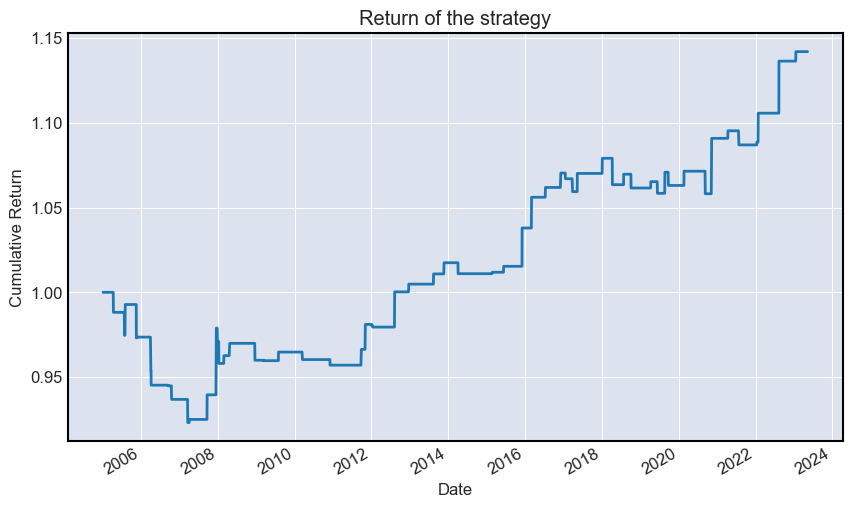

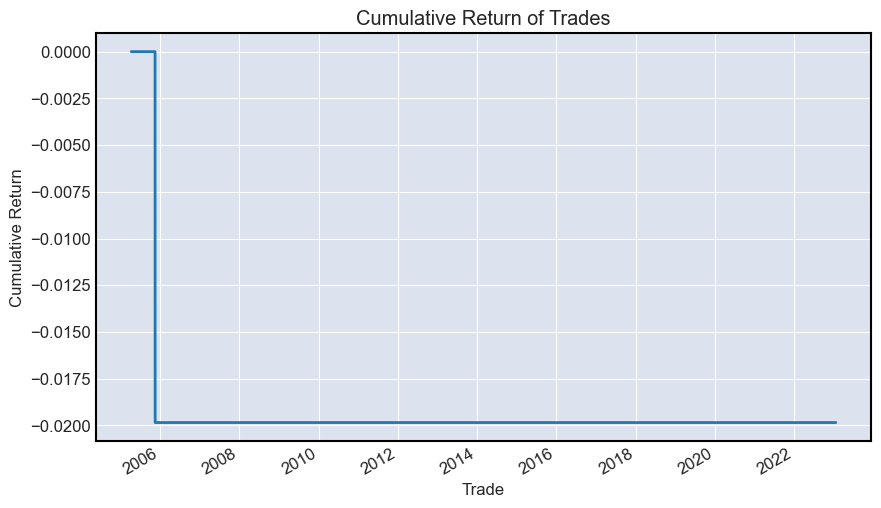

In [13]:
import matplotlib.pyplot as plt

# Visualizar o retorno da estratégia
(df['return'] + 1).cumprod().plot(figsize=(10, 6))
plt.title('Return of the strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()

# Visualizar a taxa de acerto
trades['return'].cumsum().plot(figsize=(10, 6))
plt.title('Cumulative Return of Trades')
plt.xlabel('Trade')
plt.ylabel('Cumulative Return')
plt.show()


In [14]:
df[df.signal!=0]

,Open,High,Low,Close,Valor_medio,Media_20,Dist_media,Dist_media_mm,MA20,MA50,signal,filtered_signal,return
Date,,,,,,,,,,,,,
2005-04-11,25884.0,25943.0,25695.0,25900.0,25855.50,26771.3500,871.3500,1273.198177,26717.95,26841.20,-1,-1,0.0
2005-06-15,25744.0,25744.0,24916.0,25481.0,25471.25,25117.6750,363.3250,952.510484,25158.70,25157.80,1,0,-0.0
2005-07-25,25388.0,25388.0,24410.0,24531.0,24929.25,25178.1625,647.1625,834.622314,25173.50,25193.70,-1,-1,-0.0
2005-08-01,26042.0,26452.0,25911.0,26298.0,26175.75,25266.6000,1031.4000,827.154960,25314.50,25305.16,1,1,0.0
2005-11-16,30219.0,30516.0,30157.0,30482.0,30343.50,30049.4500,432.5500,899.024749,30050.35,30067.74,-1,-1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-11,110236.0,111310.0,109604.0,109718.0,110217.00,102366.5625,7351.4375,1979.984482,102696.60,102146.62,1,1,-0.0
2022-11-23,109036.0,109285.0,107902.0,108683.0,108726.50,113194.3375,4511.3375,1995.120413,113057.60,113204.62,-1,0,-0.0
2023-01-18,111442.0,113306.0,111441.0,112452.0,112160.25,108974.4125,3477.5875,1999.281746,109085.50,109060.58,1,1,0.0


In [15]:
# Criar coluna que indica sinais de compra e venda
df['signal'] = 0
df.loc[(df['MA20'] > df['MA50']) & (df['MA20'].shift(1) < df['MA50'].shift(1)), 'signal'] = 1
df.loc[(df['MA20'] < df['MA50']) & (df['MA20'].shift(1) > df['MA50'].shift(1)), 'signal'] = -1

In [16]:
# Criar coluna que indica sinais de compra e venda
df['signal'] = 0
df[(df['Media_10'] > df['Media_20']) & (df['Media_10'].shift(1) < df['Media_20'].shift(1)), 'signal'] = 1
df.loc[(df['Media_20'] < df['Media_10']) & (df['Media_10'].shift(1) > df['Media_20'].shift(1)), 'signal'] = -1

KeyError: 'Media_10'

In [ ]:
(df['Media_10'] > df['Media_20']) & (df['Media_10'].shift(1) < df['Media_20'].shift(1))